In [51]:
# System libraries
import sys, os, gc
import datetime
import itertools

# Math libraries
import math, random
import pandas as pd, numpy as np
import scipy
from scipy import stats
import datetime
from datetime import timedelta
#from datetime import datetime

# Data storage libraries
import pickle, sqlite3, simpledbf, boto3

# Custom financial data libraries
import utils.findata_utils as fd

# Plotting libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams

db = 'C:\\Datasets\\thesis.db'
conn = sqlite3.connect(db)
c = conn.cursor()

overleaf = ['C:','Users','bryce','OneDrive','Documents','Overleaf','Thesis','assets','exports']

In [9]:
returns = pd.read_sql('''SELECT * FROM daily_abnormal_returns''', conn)

In [12]:
returns['d'] = returns.apply(lambda r: (datetime.datetime.strptime(r['date'],'%Y-%m-%d') - 
                                        datetime.datetime.strptime(str(r['rebal_date'])[:10],'%Y-%m-%d')).days,
                             axis=1)

AttributeError: 'Series' object has no attribute 'isbetween'

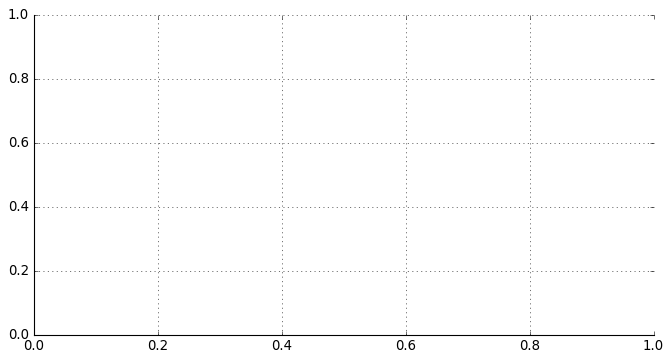

In [16]:
plt.style.use('classic')

fig = plt.figure(figsize=(10,5))
fig.patch.set_facecolor('white')

ax = fig.add_subplot(1, 1, 1)

ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.grid(True,axis='both',linestyle=':')


agg = returns

ax.plot(returns.loc[returns['d'].isbetween(-30,30)]['d'],
        returns.loc[(returns['d']<=30) & (returns['d']>=-30)]['ar_daily'].mean(),
                                          label='Abnormal returns')



ax.legend(frameon=False, loc='best')

plt.title('Portfolio returns')
plt.ylabel('Culmulative returns')
plt.xlabel('Days Since (To) Rebalance')

xlim = [-365,365]

plt.xlim(time_range)
plt.ylim(-0.5,0.5)
plt.show()

In [20]:
model_inputs = pd.read_sql('''SELECT * FROM model_inputs''',conn)

display(model_inputs.head())

,pct_contrib,turnover,VWAP,vol,VWMC,SPTSXComp,add
0,0.000080,0.047819,0.547673,3008101.0,5.260527e+07,6.545272e+11,0
1,0.000091,0.035671,0.632663,2243882.0,6.076876e+07,6.677543e+11,0
2,0.000108,0.031565,0.780580,1985592.0,7.497652e+07,6.935705e+11,0
3,0.000099,0.039976,0.715963,2514749.0,6.876985e+07,6.950506e+11,0
4,0.000128,0.050814,0.968178,3196490.0,9.299567e+07,7.271307e+11,0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "top right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


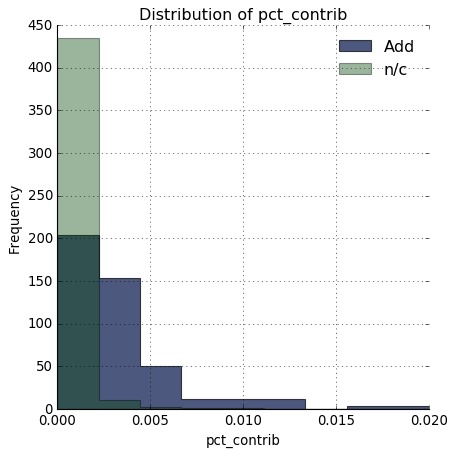

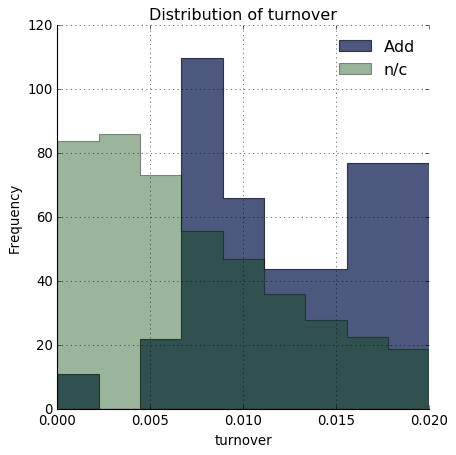

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:823: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


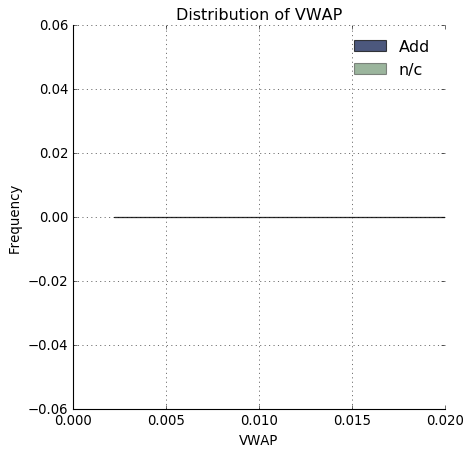

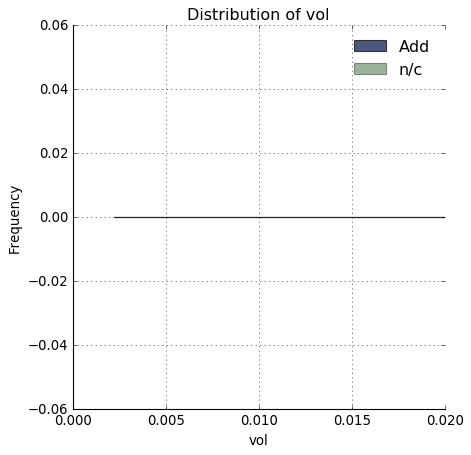

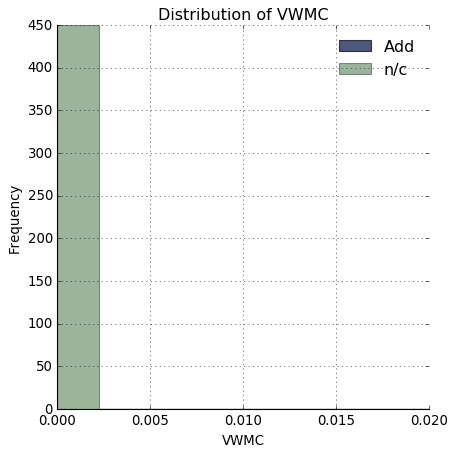

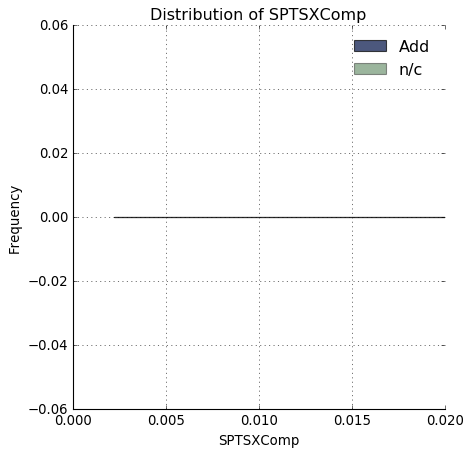

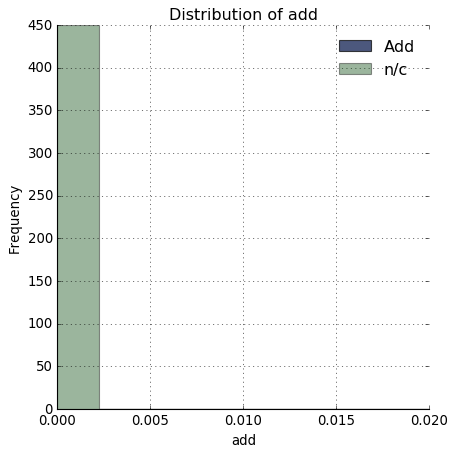

In [52]:


for factor in model_inputs.columns:
    fig = plt.figure(figsize=(6,6))
    fig.patch.set_facecolor('white')
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.grid(True,axis='both',linestyle=':')
    
    ax.hist(model_inputs.loc[model_inputs['add']==1][factor], density=True, bins=np.linspace(0,0.02,10), alpha=0.7, cumulative=False, histtype='stepfilled', label='Add', color=['xkcd:navy blue'])
    ax.hist(model_inputs.loc[model_inputs['add']==0][factor], density=True, bins=np.linspace(0,0.02,10), alpha=0.4, cumulative=False, histtype='stepfilled', label='n/c', color=['xkcd:forest green'])
    #plt.hist(y_train)
    plt.title('Distribution of {factor}'.format(factor=factor))
    plt.ylabel('Frequency')
    plt.xlabel('{factor}'.format(factor=factor))
    plt.legend(frameon=False, loc='top right')
    
    plt.xlim(0,0.02)
    
    #plt.xticks(np.linspace(0,0.02,5), np.linspace(0,2,5))
    plt.show()
    
    fig.savefig('\\'.join(overleaf+['distribution_{factor}.png'.format(factor=factor)]))